In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px


# Import data set

In [ ]:
data_train = pd.read_csv('/content/MobileTrain.csv')
data_test = pd.read_csv('/content/MobileTest.csv')

In [ ]:
data_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


# EDA


In [ ]:
data_test.info()
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [ ]:
data_test.isna().sum()
data_train.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [ ]:
data_train.shape

(2000, 21)

In [ ]:
data_test.shape

(1000, 21)

In [ ]:
data_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
data_test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

#  Distribution of RAM


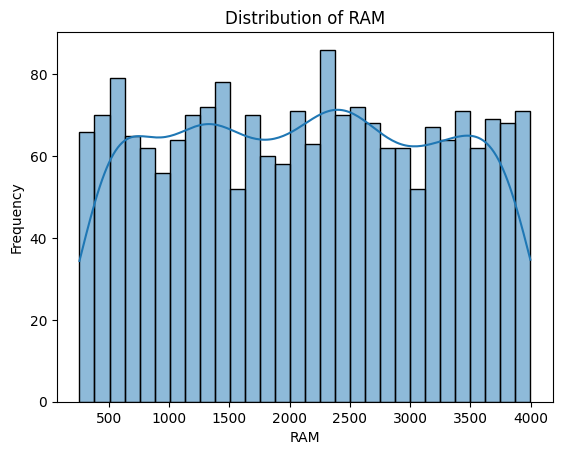

In [ ]:
sns.histplot(data_train['ram'], kde=True, bins=30)
plt.title("Distribution of RAM")
plt.xlabel("RAM")
plt.ylabel("Frequency")
plt.show()

#  Correlation Heatmap

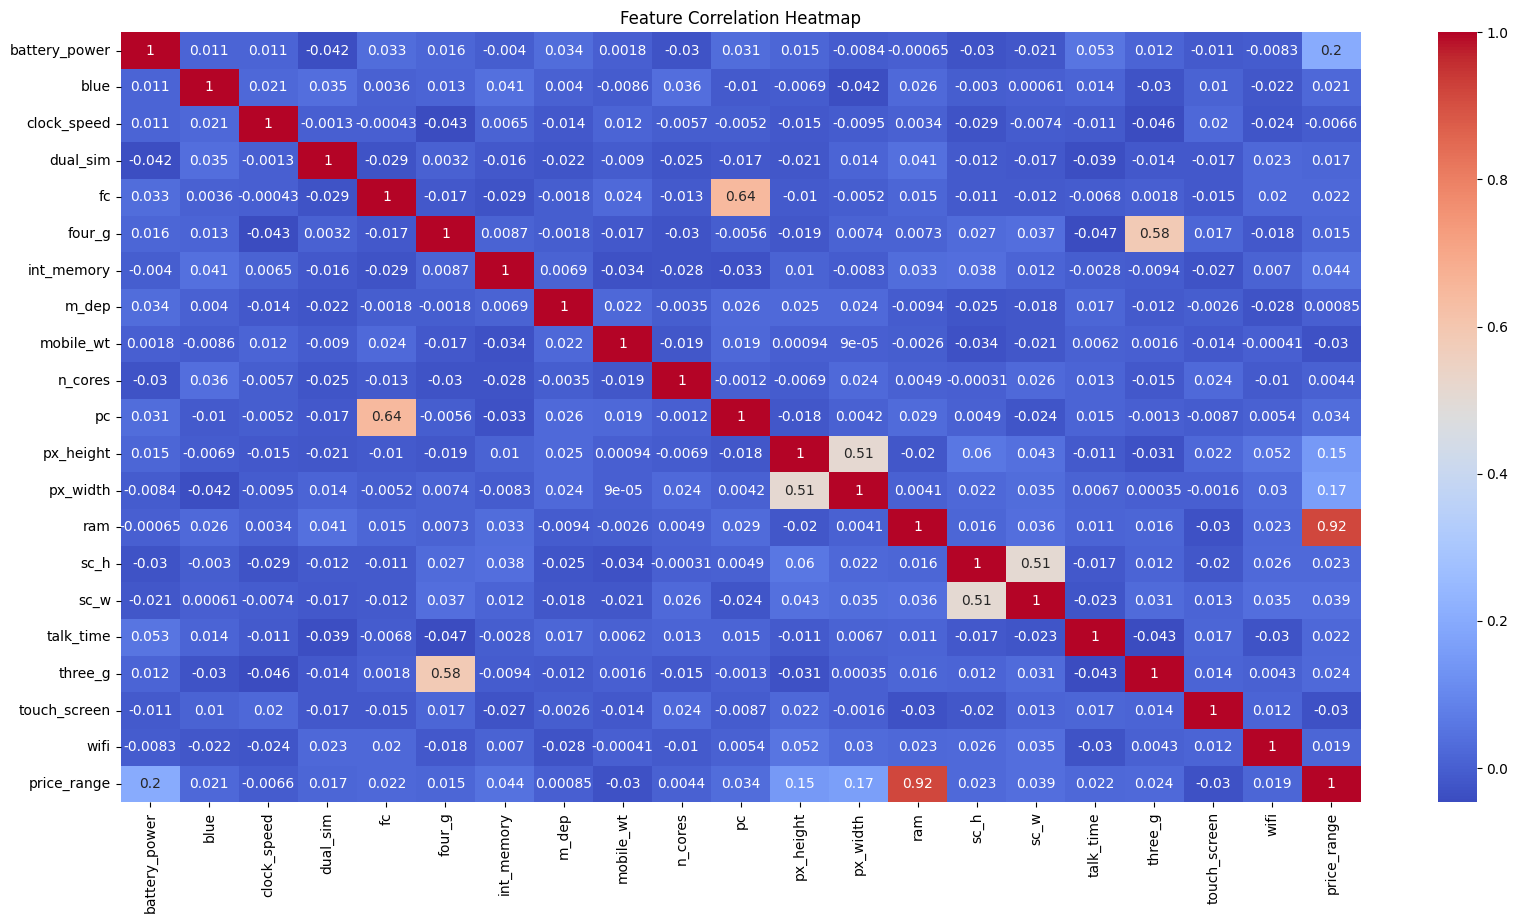

In [ ]:
correlation = data_train.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


# Box Plot of RAM by Price Range

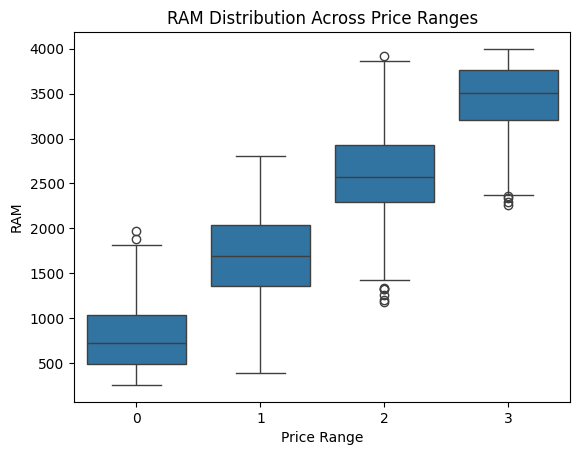

In [ ]:
sns.boxplot(x='price_range', y='ram', data=data_train)
plt.title("RAM Distribution Across Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("RAM")
plt.show()

# 4G and Price range analysis

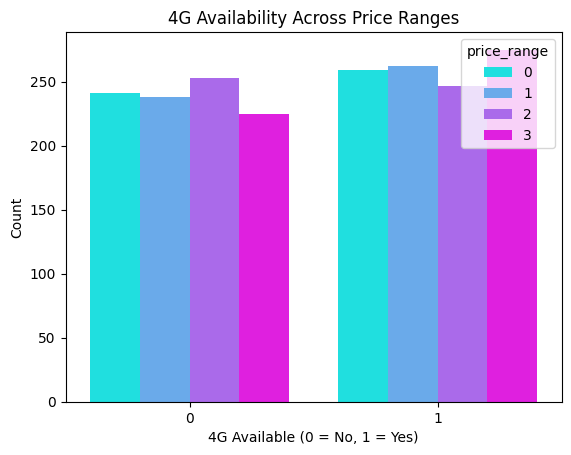

In [ ]:
sns.countplot(x='four_g', hue='price_range', data=data_train, palette='cool')
plt.title("4G Availability Across Price Ranges")
plt.xlabel("4G Available (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


# Availability of Features

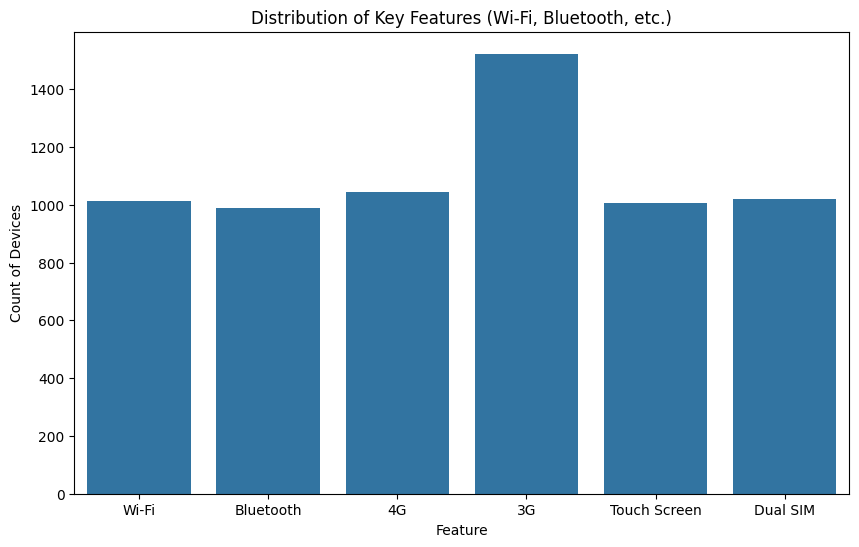

In [ ]:
feature_columns = ['wifi', 'blue', 'four_g', 'three_g', 'touch_screen', 'dual_sim']
feature_names = ['Wi-Fi', 'Bluetooth', '4G', '3G', 'Touch Screen', 'Dual SIM']

feature_data = data_train[feature_columns].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=feature_data)
plt.title('Distribution of Key Features (Wi-Fi, Bluetooth, etc.)')
plt.xlabel('Feature')
plt.ylabel('Count of Devices')
plt.show()


#  Distribution of Features



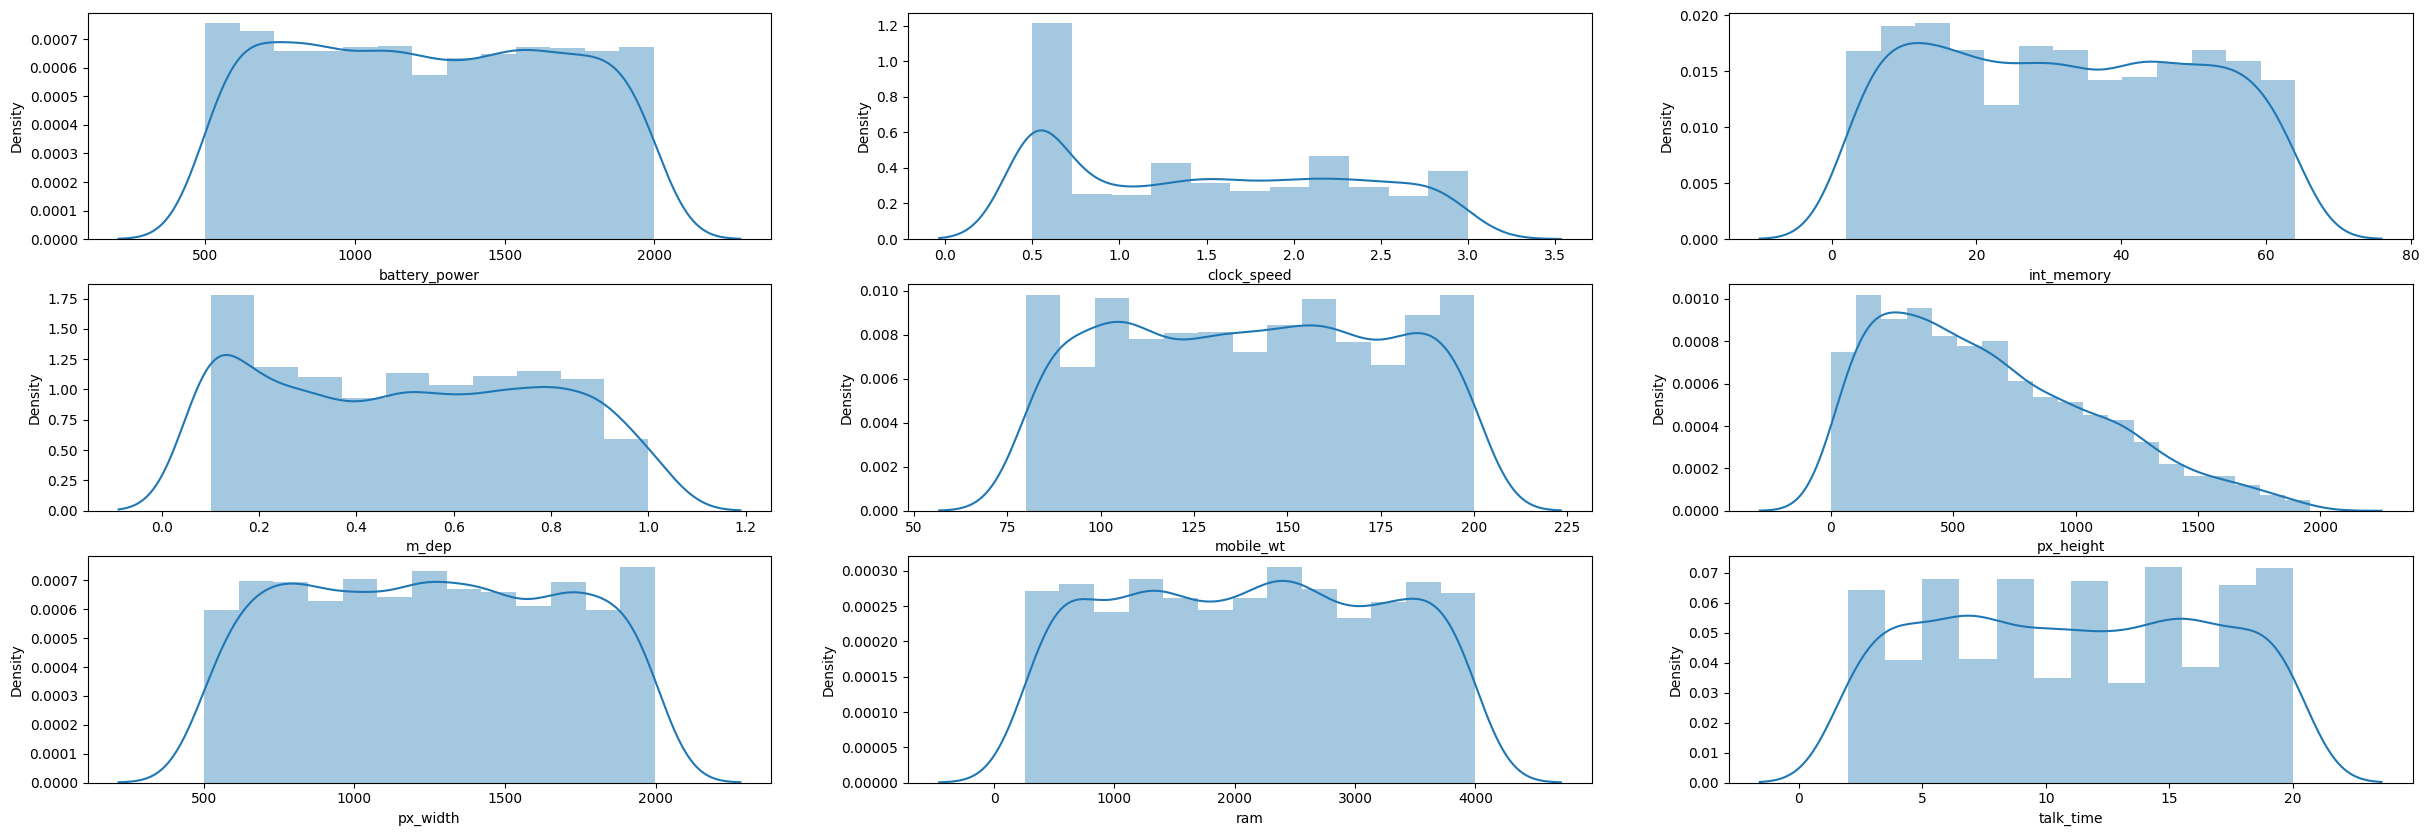

In [ ]:
# Distplot for various columns
plt.figure(figsize = (30,10))
plt.subplot(331)
sns.distplot(data_train['battery_power'])
plt.subplot(332)
sns.distplot(data_train['clock_speed'])
plt.subplot(333)
sns.distplot(data_train['int_memory'])
plt.subplot(334)
sns.distplot(data_train['m_dep'])
plt.subplot(335)
sns.distplot(data_train['mobile_wt'])
plt.subplot(336)
sns.distplot(data_train['px_height'])
plt.subplot(337)
sns.distplot(data_train['px_width'])
plt.subplot(338)
sns.distplot(data_train['ram'])
plt.subplot(339)
sns.distplot(data_train['talk_time'])
plt.show()


# Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
train_data = pd.read_csv('/content/MobileTrain.csv')

In [ ]:
x = train_data.iloc[:, :-1].values
y = train_data.iloc[:, -1].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=0)


In [ ]:
#logistic Regression
log=LogisticRegression()
log.fit(x_train,y_train)
print("Training score of LogisticRegression is: {}".format(log.score(x_train,y_train)*100))
y_predlog=log.predict(x_test)
print(y_predlog)
acrr=accuracy_score(y_test,y_predlog)*100
print("Accuracy of Logistic Regression Classifier is: {}%".format(acrr))
print("Confusion matrix Logistic Regression Classifier is: \n{}".format(confusion_matrix(y_test,y_predlog)))
print("{}".format(classification_report(y_test,y_predlog)))


Training score of LogisticRegression is: 97.93333333333332
[3 0 2 2 3 0 0 3 3 1 1 3 0 2 3 0 3 2 2 1 0 0 3 1 2 2 3 1 3 1 1 0 2 0 1 3 0
 0 3 3 3 1 3 3 1 3 0 1 3 1 1 3 0 3 0 2 2 2 0 3 3 1 3 2 1 2 3 2 2 2 3 2 1 0
 1 3 2 2 1 2 3 3 3 0 0 0 2 1 2 3 1 2 2 1 0 3 3 3 0 3 1 1 2 1 3 2 2 3 2 3 3
 0 0 1 3 3 0 0 1 0 0 3 2 2 1 2 1 1 0 2 1 3 3 3 3 3 3 2 0 1 1 2 1 3 0 3 0 0
 2 0 1 1 1 1 3 0 0 3 1 3 2 1 3 1 2 3 3 2 1 0 3 1 2 3 3 0 2 2 3 1 2 1 0 1 2
 1 2 0 3 3 1 1 0 2 3 0 1 2 2 0 3 3 3 1 2 3 3 3 0 0 0 2 3 3 0 0 1 3 2 3 3 3
 0 0 2 3 3 1 0 2 0 0 0 3 2 1 2 2 1 1 0 2 3 3 0 0 1 3 3 1 3 0 3 1 1 0 2 3 3
 2 0 0 1 2 3 2 2 3 1 1 0 3 3 2 1 3 2 2 2 1 0 2 2 1 0 0 2 2 2 3 0 1 3 0 2 2
 3 0 2 0 1 1 3 0 0 2 3 1 2 0 2 0 3 0 3 3 2 3 1 2 2 1 1 2 0 1 0 3 1 0 3 0 0
 1 3 0 3 1 1 0 1 3 0 2 1 1 2 1 1 0 2 0 0 3 1 2 3 2 2 0 3 2 2 1 3 2 3 3 3 0
 2 0 3 0 1 1 2 3 1 3 1 2 0 1 2 3 0 0 1 3 0 3 0 2 2 1 1 0 2 0 0 1 3 0 3 3 0
 2 1 3 1 1 3 2 0 3 2 2 0 0 3 0 1 1 1 3 2 3 2 0 3 0 0 1 3 0 0 3 2 2 2 3 0 0
 1 2 1 2 0 3 3 0 3 3 0 2 2 1 0 2 2 1 3 2 

In [ ]:
#Gussain NB
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
print("Training score of GaussianNB is {}".format(nb.score(x_train,y_train)*100))
y_pred=nb.predict(x_test)
ac_nb=accuracy_score(y_test,y_pred)*100
print("Accuracy of Naive Bayes Classifier is: {}".format(ac_nb))
print("Confusion matrix of Naive Bayes Classifier is:{}".format(confusion_matrix(y_test,y_pred)))
print("{}".format(classification_report(y_test,y_pred)))


Training score of GaussianNB is 81.39999999999999
Accuracy of Naive Bayes Classifier is: 84.39999999999999
Confusion matrix of Naive Bayes Classifier is:[[117   7   0   0]
 [  6  83  21   0]
 [  0  22  92  11]
 [  0   0  11 130]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       124
           1       0.74      0.75      0.75       110
           2       0.74      0.74      0.74       125
           3       0.92      0.92      0.92       141

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



In [ ]:
#SVM
from sklearn.svm import SVC
svm=SVC(kernel='rbf')
svm.fit(x_train,y_train)
print("Training score of SVM is: {}".format(svm.score(x_train,y_train)*100))
y_pred_svm=svm.predict(x_test)
ac_svm=accuracy_score(y_test,y_pred_svm)*100
print("Accuracy of SVM is: {}".format(ac_svm))
print("Confusion matrix of SVM is: {}".format(confusion_matrix(y_test,y_pred_svm)))
print("{}".format(classification_report(y_test,y_pred_svm)))


Training score of SVM is: 98.06666666666666
Accuracy of SVM is: 89.0
Confusion matrix of SVM is: [[118   6   0   0]
 [  6  96   8   0]
 [  0  15 106   4]
 [  0   0  16 125]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       124
           1       0.82      0.87      0.85       110
           2       0.82      0.85      0.83       125
           3       0.97      0.89      0.93       141

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion = "entropy")
DT.fit(x_train,y_train)
print("Training score of DecisionTreeClassifier is: {}".format(DT.score(x_train,y_train)*100))
y_pred_DT=DT.predict(x_test)
ac_DT=accuracy_score(y_test,y_pred_DT)*100
print("Accuracy of Decision Tree Classifier is: {}".format(ac_DT))
print("Confusion matrix of Decision Tree Classifier is: {}".format(confusion_matrix(y_test,y_pred_DT)))
print("{}".format(classification_report(y_test,y_pred_DT)))

Training score of DecisionTreeClassifier is: 100.0
Accuracy of Decision Tree Classifier is: 85.8
Confusion matrix of Decision Tree Classifier is: [[113  11   0   0]
 [  9  93   8   0]
 [  0  12 100  13]
 [  0   0  18 123]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       124
           1       0.80      0.85      0.82       110
           2       0.79      0.80      0.80       125
           3       0.90      0.87      0.89       141

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=300)
RF.fit(x_train,y_train)
print("Training score of Random Forest Classifier is: {}".format(RF.score(x_train,y_train)*100))
y_pred_RF=RF.predict(x_test)
ac_RF=accuracy_score(y_test,y_pred_RF)*100
print("Accuracy of Random Forest Classifier is: {}".format(ac_RF))
print("Confusion matrix of Random Forest Classifier is: {}".format(confusion_matrix(y_test,y_pred_RF)))
print("{}".format(classification_report(y_test,y_pred_RF)))

Training score of Random Forest Classifier is: 100.0
Accuracy of Random Forest Classifier is: 87.6
Confusion matrix of Random Forest Classifier is: [[122   2   0   0]
 [  7  91  12   0]
 [  0  18  96  11]
 [  0   0  12 129]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       124
           1       0.82      0.83      0.82       110
           2       0.80      0.77      0.78       125
           3       0.92      0.91      0.92       141

    accuracy                           0.88       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.88      0.88       500



In [ ]:
#Classifiers
classifiers=["LogisticRegression","GaussianNB","SVM","DecisionTreeClassifier","RandomForestClassifier"]
accuracy_=[acrr,ac_nb,ac_svm,ac_DT,ac_RF]
df_ac=pd.DataFrame({'model':classifiers,"accuracy":accuracy_})
px.histogram(data_frame=df_ac,x="model",y="accuracy")


In [ ]:
data1 =train_data.loc[:,['battery_power','blue','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','price_range']]
data1

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,price_range
0,842,0,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,1
1,1021,1,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,2
2,563,1,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,2
3,615,1,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,2
4,1821,1,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,0
1996,1965,1,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,2
1997,1911,0,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,3
1998,1512,0,0,4,1,46,0.1,145,5,5,336,670,869,18,10,0


In [ ]:
data2 = train_data.loc[:,['talk_time','three_g','wifi','touch_screen','clock_speed']]
data2

,talk_time,three_g,wifi,touch_screen,clock_speed
0,19,0,1,0,2.2
1,7,1,0,1,0.5
2,9,1,0,1,0.5
3,11,1,0,0,2.5
4,15,1,0,1,1.2
...,...,...,...,...,...
1995,19,1,0,1,0.5
1996,16,1,1,1,2.6
1997,5,1,0,1,0.9
1998,19,1,1,1,0.9


In [ ]:
#merging dataset
data3 = pd.concat([data1, data2], axis=1)
data3

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,...,px_width,ram,sc_h,sc_w,price_range,talk_time,three_g,wifi,touch_screen,clock_speed
0,842,0,0,1,0,7,0.6,188,2,2,...,756,2549,9,7,1,19,0,1,0,2.2
1,1021,1,1,0,1,53,0.7,136,3,6,...,1988,2631,17,3,2,7,1,0,1,0.5
2,563,1,1,2,1,41,0.9,145,5,6,...,1716,2603,11,2,2,9,1,0,1,0.5
3,615,1,0,0,0,10,0.8,131,6,9,...,1786,2769,16,8,2,11,1,0,0,2.5
4,1821,1,0,13,1,44,0.6,141,2,14,...,1212,1411,8,2,1,15,1,0,1,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,0,1,2,0.8,106,6,14,...,1890,668,13,4,0,19,1,0,1,0.5
1996,1965,1,1,0,0,39,0.2,187,4,3,...,1965,2032,11,10,2,16,1,1,1,2.6
1997,1911,0,1,1,1,36,0.7,108,8,3,...,1632,3057,9,1,3,5,1,0,1,0.9
1998,1512,0,0,4,1,46,0.1,145,5,5,...,670,869,18,10,0,19,1,1,1,0.9


# Ranking Dataset According to the Price range

In [ ]:
dt = train_data
dt["rank_by_price"] = dt["price_range"].rank()
dt1 = dt
dt1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,750.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,1250.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,1250.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,1250.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,750.5


In [ ]:
dt1['rank_by_price'].unique()


array([ 750.5, 1250.5, 1750.5,  250.5])

# Sorting the dataset according to ranked_price_range

In [ ]:
dt1.sort_values(by=["rank_by_price"])

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
1838,720,1,0.9,1,12,1,14,0.8,165,4,...,1234,1086,14,7,3,1,1,0,0,250.5
1762,808,1,0.5,1,3,0,46,0.5,105,8,...,529,1082,15,5,10,1,0,1,0,250.5
419,914,1,0.9,0,2,0,4,0.8,100,2,...,1495,808,11,7,5,1,1,0,0,250.5
846,1489,0,2.4,1,8,0,32,0.6,200,1,...,812,776,7,6,8,0,0,0,0,250.5
845,1907,0,2.0,0,13,0,55,0.9,105,7,...,1513,286,14,4,17,1,0,1,0,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1046,1,2.8,1,0,1,58,0.2,100,8,...,1040,3863,17,12,9,1,1,1,3,1750.5
982,1035,0,0.6,1,2,1,44,0.5,99,3,...,1960,3506,14,5,12,1,1,0,3,1750.5
987,1688,0,2.5,0,0,1,21,0.2,170,7,...,864,3984,17,14,8,1,1,1,3,1750.5
956,862,0,2.3,0,9,1,6,0.1,107,8,...,1977,3458,9,4,9,1,1,1,3,1750.5


#Ranking on all the features using rank()

In [ ]:
dt2 = train_data
RankedDataset1 = dt2.rank()
RankedDataset1.sort_values(by="price_range")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
1838,320.5,1505.5,638.5,1491.0,1853.0,1479.0,432.0,1595.5,1414.5,872.5,...,978.0,445.5,1214.0,1284.5,146.5,1239.0,1497.5,493.5,250.5,250.5
1762,435.5,1505.5,207.0,1491.0,993.5,479.0,1451.5,1003.0,436.0,1872.5,...,45.0,442.0,1353.0,1008.0,901.0,1239.0,497.5,1493.5,250.5,250.5
419,589.0,1505.5,638.5,491.0,814.0,479.0,77.5,1595.5,325.5,366.0,...,1341.0,306.0,791.5,1284.5,363.0,1239.0,1497.5,493.5,250.5,250.5
846,1323.5,505.5,1612.5,1491.0,1601.0,479.0,1011.0,1198.5,1991.0,121.5,...,408.0,292.0,287.0,1153.5,696.5,239.0,497.5,493.5,250.5,250.5
845,1875.0,505.5,1337.0,491.0,1895.5,479.0,1727.0,1797.0,436.0,1615.0,...,1363.0,16.0,1214.0,836.5,1636.5,1239.0,497.5,1493.5,250.5,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,753.0,1505.5,1868.0,1491.0,237.5,1479.0,1828.5,427.0,325.5,1872.5,...,728.0,1919.0,1660.0,1797.5,798.5,1239.0,1497.5,1493.5,1750.5,1750.5
982,737.5,505.5,450.5,1491.0,814.0,1479.0,1382.0,1003.0,309.0,612.5,...,1937.0,1732.0,1214.0,1008.0,1106.0,1239.0,1497.5,493.5,1750.5,1750.5
987,1583.0,505.5,1678.5,491.0,237.5,1479.0,669.5,427.0,1496.0,1615.0,...,481.5,1994.0,1660.0,1897.0,696.5,1239.0,1497.5,1493.5,1750.5,1750.5
956,515.5,505.5,1544.5,491.0,1678.5,1479.0,142.0,160.5,472.5,1872.5,...,1966.0,1703.5,541.5,836.5,798.5,1239.0,1497.5,1493.5,1750.5,1750.5


# Rankig all the features seperately to correct output

In [ ]:
b = dt2
b["rank_by_price"] = b["price_range"].rank()
b["rank_by_battery"] = b["battery_power"].rank(ascending=False)
b["rank_by_blueooth"] = b["blue"].rank(ascending=False)
b["rank_by_clockspeed"] = b["clock_speed"].rank(ascending=False)
b["rank_by_DualSIM"] = b["dual_sim"].rank(ascending=False)
b["rank_by_fc"] = b["fc"].rank(ascending=False)
b["rank_by_4G"] = b["four_g"].rank(ascending=False)
b["rank_by_InternalMemory"] = b["int_memory"].rank(ascending=False)
b["rank_by_mdep"] = b["m_dep"].rank(ascending=False)
b["rank_by_weight"] = b["mobile_wt"].rank(ascending=True)
b["rank_by_ncores"] = b["n_cores"].rank(ascending=False)
b["rank_by_pc"] = b["pc"].rank(ascending=False)
b["rank_by_height"] = b["px_height"].rank(ascending=False)
b["rank_by_width"] = b["px_width"].rank(ascending=False)
b["rank_by_ram"] = b["ram"].rank(ascending=False)
b["rank_by_sch"] = b["sc_h"].rank(ascending=False)
b["rank_by_scw"] = b["sc_w"].rank(ascending=False)
b["rank_by_talktime"] = b["talk_time"].rank(ascending=False)
b["rank_by_3G"] = b["three_g"].rank(ascending=False)
b["rank_by_touchscreen"] = b["touch_screen"].rank(ascending=False)
b["rank_by_wifi"] = b["wifi"].rank(ascending=False)
b.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5
